In [ ]:
!pip install isoweek

In [ ]:
!wget 'https://raw.githubusercontent.com/AndrDFg/Homework.-Netology.-Data-Science/05fe52710766aa55997d549cabb35becae0e4abd/13.%20%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%80%D1%8F%D0%B4%D1%8B/%D0%94%D0%97_1_%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%80%D1%8F%D0%B4%D1%8B%2C%20%D0%BE%D0%B1%D1%89%D0%B0%D1%8F%20%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/time_series6_csv.zip' -O zip_temp.zip


--2025-05-25 13:09:01--  https://raw.githubusercontent.com/AndrDFg/Homework.-Netology.-Data-Science/05fe52710766aa55997d549cabb35becae0e4abd/13.%20%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%80%D1%8F%D0%B4%D1%8B/%D0%94%D0%97_1_%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%80%D1%8F%D0%B4%D1%8B%2C%20%D0%BE%D0%B1%D1%89%D0%B0%D1%8F%20%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/time_series6_csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5687 (5.6K) [application/zip]
Saving to: ‘zip_temp.zip’

zip_temp.zip        100%[===================>]   5.55K  --.-KB/s    in 0s      

2025-05-25 13:09:01 (49.5 MB/s) - ‘zip_temp.zip’ saved [5687/5687]



In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
import zipfile, re, numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller # Проверка стационарности с помощью теста Дики-Фуллера
from scipy.stats import boxcox                 # Метод для нормализации дисперсии

In [ ]:

#zip_path = '/content/drive/MyDrive/DFD_Учёба/Домашнее Задание/13. Временные ряды/ДЗ_1_Временные ряды общая теория/time_series_6_csv.zip'

In [ ]:
with zipfile.ZipFile(file='/content/zip_temp.zip', mode='r') as zip_:
   files_list = [file.filename for file in zip_.filelist]
print('Содержимое zip архива:')
files_list

Содержимое zip архива:


['mean-monthly-air-temperature-deg.csv',
 'monthly-boston-armed-robberies-j.csv',
 'monthly-sales-of-company-x-jan-6.csv',
 'weekly-closings-of-the-dowjones-.csv',
 'daily-total-female-births-in-cal.csv',
 'international-airline-passengers.csv']

In [ ]:
with zipfile.ZipFile('/content/zip_temp.zip', mode='r') as data_files:
  data_files.extractall()

In [ ]:
mean_monthly_air_temperature_deg = pd.read_csv('mean-monthly-air-temperature-deg.csv') # среднемесячная температура воздуха,град
monthly_boston_armed_robberies = pd.read_csv('monthly-boston-armed-robberies-j.csv')   # ежемесячные вооруженные ограбления в Бостоне
monthly_sales_of_company_x_jan = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')   # ежемесячные продажи компании-x январь
weekly_closings_of_the_dowjones = pd.read_csv('weekly-closings-of-the-dowjones-.csv')  # еженедельные закрытия индекса dowjones
daily_total_female_births_in_cal = pd.read_csv('daily-total-female-births-in-cal.csv') # ежедневное общее число рождений женщин в Калифорнии
international_airline_passengers = pd.read_csv('international-airline-passengers.csv') # международные авиакомпании пассажиры

## **Графики полученных данных**

In [ ]:
# Формирую словарик, где ключи - названия датасетов, значения: весь датафрейм, данные и название 1 столбца для оси x, данные и название 2 столбца для оси y
dict_datasets = {'mean_monthly_air_temperature_deg': (mean_monthly_air_temperature_deg, mean_monthly_air_temperature_deg.columns[0], mean_monthly_air_temperature_deg.columns[1]),
 'monthly_boston_armed_robberies': (monthly_boston_armed_robberies, monthly_boston_armed_robberies.columns[0], monthly_boston_armed_robberies.columns[1]),
 'monthly_sales_of_company_x_jan': (monthly_sales_of_company_x_jan, monthly_sales_of_company_x_jan.columns[0], monthly_sales_of_company_x_jan.columns[1]),
 'weekly_closings_of_the_dowjones': (weekly_closings_of_the_dowjones, weekly_closings_of_the_dowjones.columns[0], weekly_closings_of_the_dowjones.columns[1]),
 'daily_total_female_births_in_cal': (daily_total_female_births_in_cal, daily_total_female_births_in_cal.columns[0], daily_total_female_births_in_cal.columns[1]),
 'international_airline_passengers': (international_airline_passengers, international_airline_passengers.columns[0], international_airline_passengers.columns[1])}

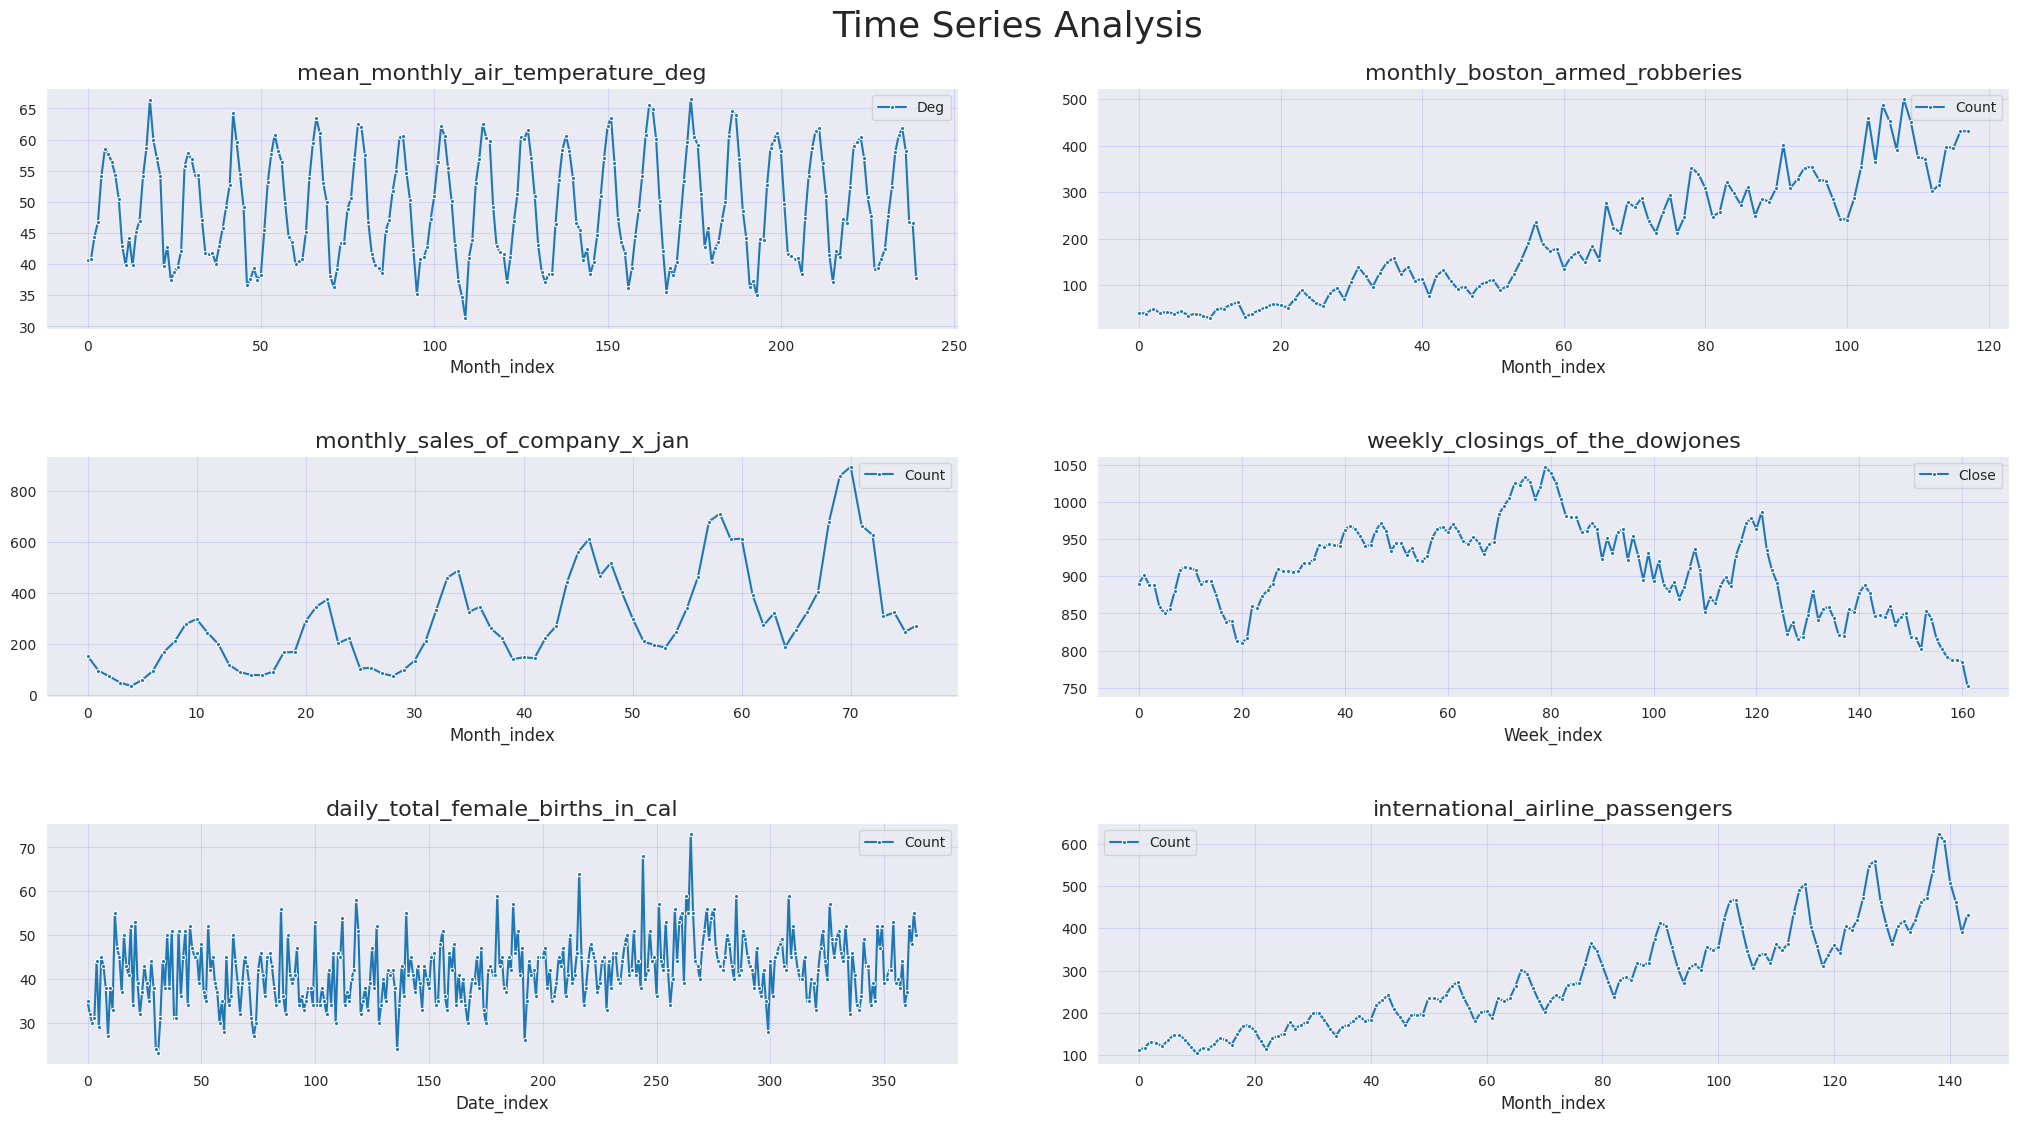

In [ ]:
sns.set_style(style='darkgrid')
figura, axs = plt.subplots(nrows=3, ncols=2, figsize=(22, 12))
plt.tight_layout(pad=7.0) # компановка
axs = axs.flatten() # конвертация в одномерный массив
figura.suptitle("Time Series Analysis", fontsize=26)
for i, (key_title, (data, x_name_col, y_name_col)) in enumerate(dict_datasets.items()):
  ax = sns.lineplot(data=data, ax=axs[i], marker='o', markersize=3) #x=x_name_col, y=y_name_col - временные ряды по оси х не влезают. Более наглядно просмотр времени по номеру индекса
  ax.set_title(key_title, fontsize=16)
  ax.set_xlabel(x_name_col+"_index", fontsize=12)
  ax.tick_params(grid_alpha=0.1, grid_color='b')

## ФУНКЦИИ

In [ ]:
def series_index_date(df, label_date, start_date, freq):
  """Функция которое формирует Series c индексом типа DatetimeIndex"""
  date_index = pd.date_range(start=start_date,  periods=df.shape[0], freq=freq)
  df_check_date = df.set_index(date_index)
  df_check_date.drop(labels=label_date, axis=1, inplace=True)
  return df_check_date.iloc[:, 0]

In [ ]:
def check_stationarity(timeseries, window=12):
    # Проверка стационарности с помощью теста Дики-Фуллера
    result = adfuller(timeseries.dropna())

    print('Результаты теста на стационарность:')
    print(f'ADF статистика: {result[0]:.5f}')
    print(f'p-значение: {result[1]:.5f}')

    # Если p-значение < 0.05, то ряд стационарен
    if result[1] < 0.05:
        print("Вывод: Ряд стационарен")
    else:
        print("Вывод: Ряд не стационарен")

    # Визуальная проверка
    plt.figure(figsize=(16, 8))

    # График исходных данных
    plt.subplot(221)
    sns.lineplot(timeseries)
    plt.title('Исходные данные')
    plt.grid(True)
    plt.tick_params(grid_alpha=0.1, grid_color='b')

    # График скользящего среднего и стандартного отклонения
    plt.subplot(222)
    rolling_mean = timeseries.rolling(window=window).mean()
    plt.plot(timeseries, label='Исходные данные')
    plt.plot(rolling_mean, label=f'Скользящее среднее ({window})', color='red')
    plt.legend()
    plt.title('Скользящее среднее')
    plt.grid(True)
    plt.tick_params(grid_alpha=0.1, grid_color='b')

    # Гистограмма распределения
    plt.subplot(223)
    sns.histplot(timeseries, kde=True)
    plt.title('Распределение значений')
    plt.tick_params(grid_alpha=0.1, grid_color='b')

    # Боксплот распределение
    plt.subplot(224)
    sns.boxplot(x=timeseries)
    plt.title('Оценка центральной тенденции, разброс и наличие выбросов')
    plt.tick_params(grid_alpha=0.1, grid_color='b')

    plt.tight_layout(pad=4) # настройка отступов, компановка

In [ ]:
def fix_stationarity(timeseries, diff1=1, diff2=12):
  transform_series = timeseries.apply(lambda x: np.sqrt(x)) # транформированная серия (квадратный корень)
  date_index = timeseries.index # сохранение индекс даты в переменную
  _values = timeseries.values   # сохранение данных серии в массив
  box_cox = boxcox(_values, 0)  # формирование данных boxcox
  series_box_cox = pd.Series(data=box_cox, index=date_index, name='box_cox')  # транформированная серия (данные boxcox)
  plt.figure(figsize=(16, 10))

  # График исходных данных
  plt.subplot(321)
  result_fuller = adfuller(_values)
  sns.lineplot(timeseries, label=f' тест Дики-Фуллера: p-value {result_fuller[1]:.4f}', marker='o', markersize=3)
  plt.title('Исходные данные')
  plt.legend()
  plt.grid(True)
  plt.tick_params(grid_alpha=0.1, grid_color='b')

  # График применения метода boscox
  plt.subplot(322)
  result_fuller1 = adfuller(box_cox)

  sns.lineplot(series_box_cox, label=f' тест Дики-Фуллера: p-value {result_fuller1[1]:.4f}', color='g', marker='o', markersize=3)
  plt.title(f'Нормализация дисперсии: метод boxcox')
  plt.legend()
  plt.grid(True)
  plt.tick_params(grid_alpha=0.1, grid_color='g')

  # График  дифференцирования c лагом diff1 (по умолчании лаг 1)
  plt.subplot(323)
  result_fuller2 = adfuller(timeseries.diff(diff1).dropna())

  sns.lineplot(timeseries.diff(diff1), label=f' тест Дики-Фуллера: p-value {result_fuller2[1]:.4f}', color='g', marker='o', markersize=3)
  plt.title(f'Устранение тренда: дифференцирование c лагом {diff1}')
  plt.legend()
  plt.grid(True)
  plt.tick_params(grid_alpha=0.1, grid_color='g')

  # График  дифференцирования c лагом diff2 (по умолчании лаг 12)
  plt.subplot(324)
  result_fuller3 = adfuller(timeseries.diff(diff2).dropna())

  sns.lineplot(timeseries.diff(diff2), label=f' тест Дики-Фуллера: p-value {result_fuller3[1]:.4f}', color='g', marker='o', markersize=3)
  plt.title(f'Устранение тренда: дифференцирование c лагом {diff2}')
  plt.legend()
  plt.grid(True)
  plt.tick_params(grid_alpha=0.1, grid_color='g')

  # График с преобразованием данных в квадратный корень (или ln(x))
  plt.subplot(325)
  result_fuller4 = adfuller(transform_series.diff(diff2).dropna())

  sns.lineplot(transform_series.diff(diff2), label=f' тест Дики-Фуллера: p-value {result_fuller4[1]:.4f}', color='g', marker='o', markersize=3)
  plt.title(f'Нормализация дисперсии: квадратный корень (√x) + дифференцирование c лагом {diff2}')
  plt.legend()
  plt.grid(True)
  plt.tick_params(grid_alpha=0.1, grid_color='b')

  # График с применением метода boxcox с последующим дифференцирование c лагом diff2 (по умолчании лаг 12)
  plt.subplot(326)
  result_fuller5 = adfuller(series_box_cox.diff(diff2).dropna())

  sns.lineplot(series_box_cox.diff(diff2), label=f' тест Дики-Фуллера: p-value {result_fuller5[1]:.4f}', color='g', marker='o', markersize=3)
  plt.title(f'Нормализация дисперсии: метод boxcox + дифференцирование c лагом {diff2}')
  plt.legend()
  plt.grid(True)
  plt.tick_params(grid_alpha=0.1, grid_color='b')

  plt.tight_layout(pad=3)

## **mean_monthly_air_temperature_deg** (Средняя месячная температура воздуха)




In [ ]:
df_chart_1 = series_index_date(dict_datasets['mean_monthly_air_temperature_deg'][0], label_date='Month', start_date='1920', freq='ME')

Результаты теста на стационарность:
ADF статистика: -3.25549
p-значение: 0.01699
Вывод: Ряд стационарен


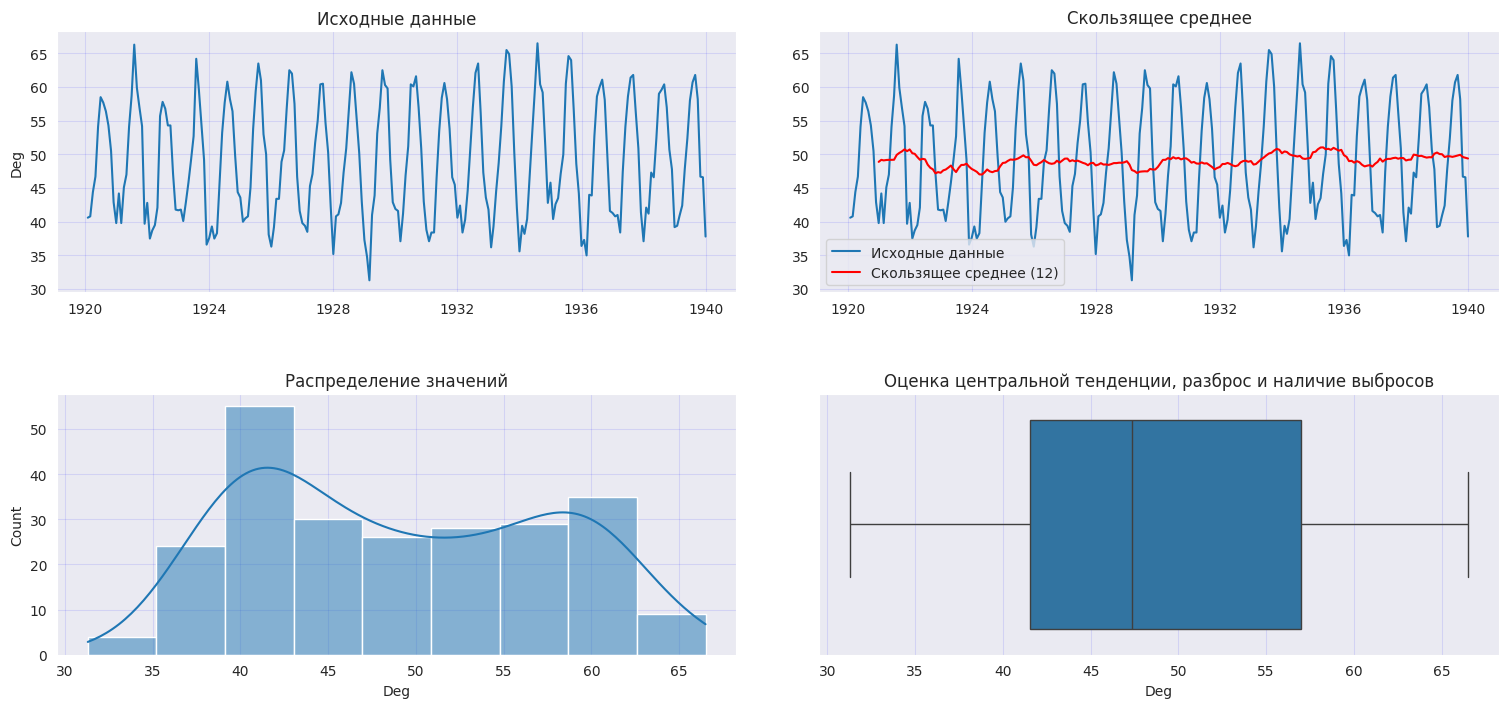

In [ ]:
# АНАЛИЗ и ОЦЕНКА ВРЕМЕННОГО РЯДА
check_stationarity(df_chart_1, window=12)

## **monthly_boston_armed_robberies** (Ежемесячные ограбления в Бостоне)

In [ ]:
df_chart_2 = series_index_date(dict_datasets['monthly_boston_armed_robberies'][0], label_date='Month', start_date='1966', freq='ME')
df_chart_2.head(3)

,Count
1966-01-31,41
1966-02-28,39
1966-03-31,50


Результаты теста на стационарность:
ADF статистика: 1.00110
p-значение: 0.99428
Вывод: Ряд не стационарен


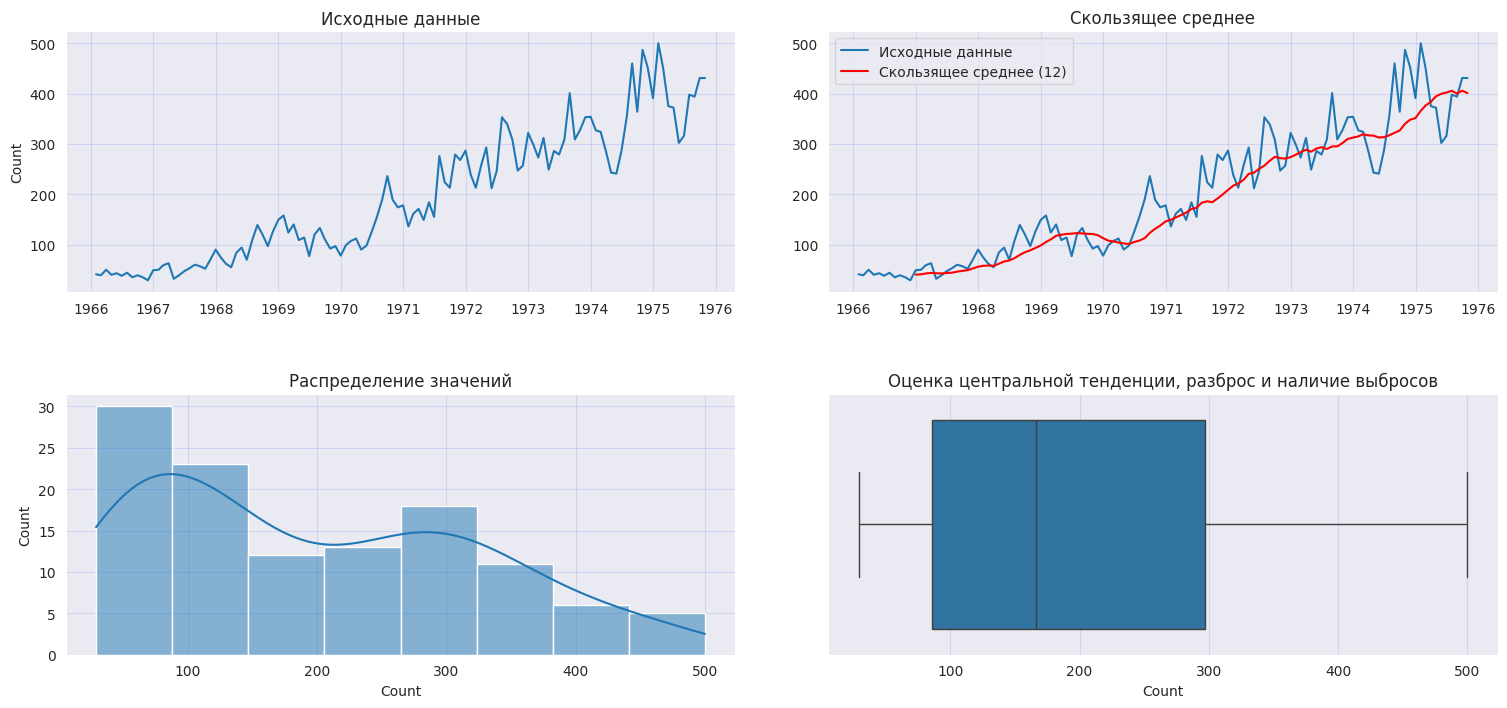

In [ ]:
# АНАЛИЗ и ОЦЕНКА ВРЕМЕННОГО РЯДА
check_stationarity(df_chart_2)

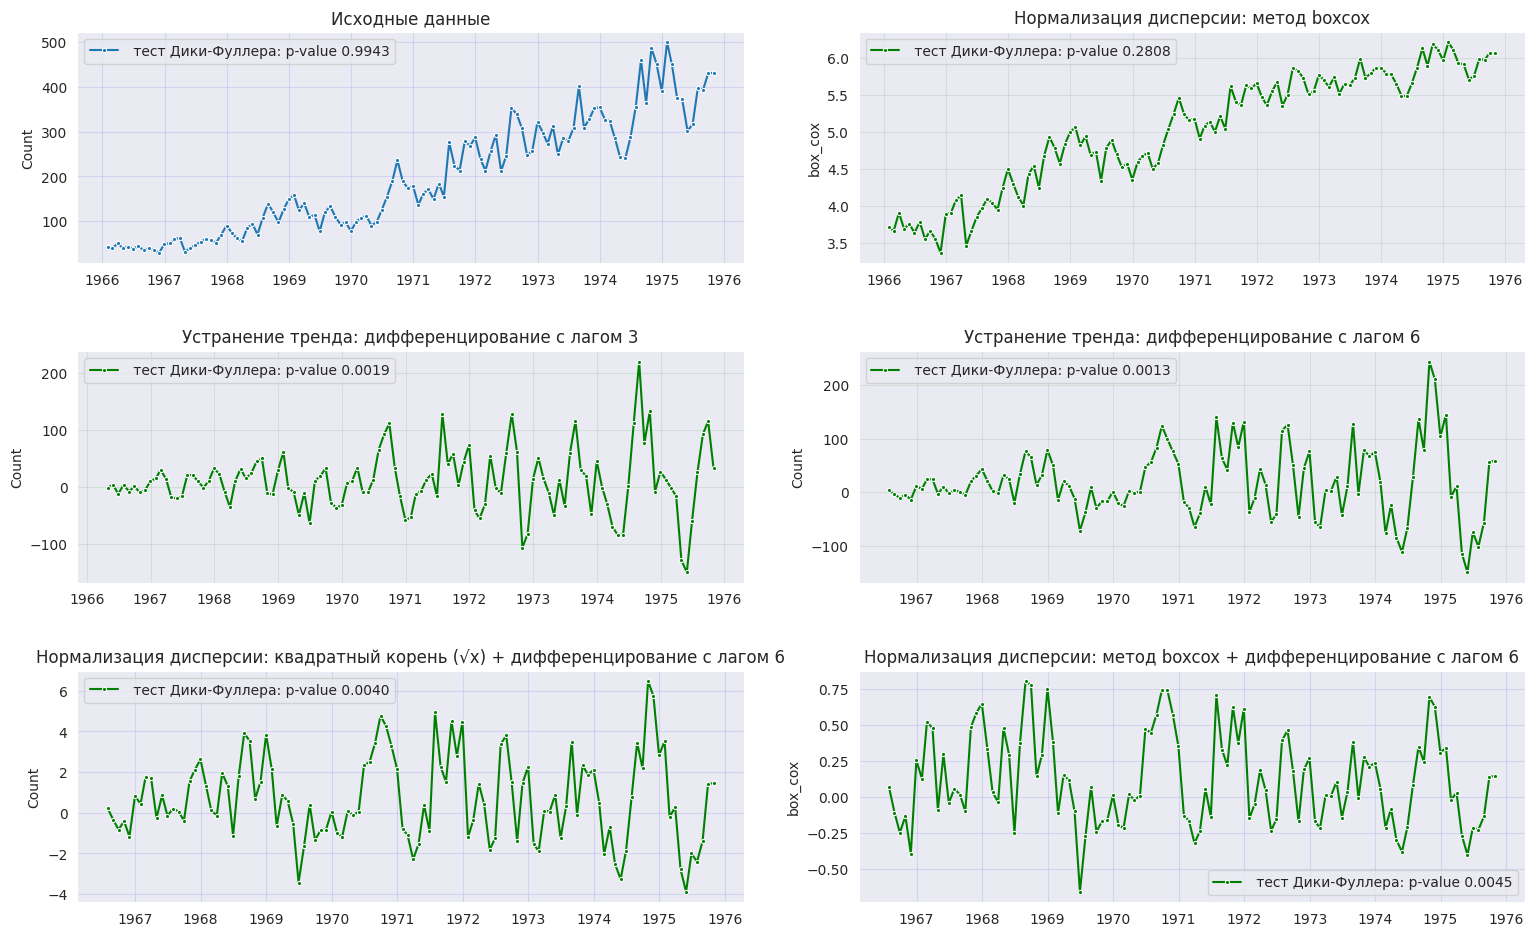

In [ ]:
# ПРЕОБРАЗОВАНИЕ В СТАЦИОНАРНЫЙ РЯД
fix_stationarity(df_chart_2, 3, 6)

## **daily_total_female_births_in_cal** (ежедневное общее число рождений женщин)

In [ ]:
df_chart_3 = series_index_date(dict_datasets['daily_total_female_births_in_cal'][0], label_date='Date', start_date='1959', freq='D')
df_chart_3.head(3)

,Count
1959-01-01,35
1959-01-02,32
1959-01-03,30


Результаты теста на стационарность:
ADF статистика: -4.80829
p-значение: 0.00005
Вывод: Ряд стационарен


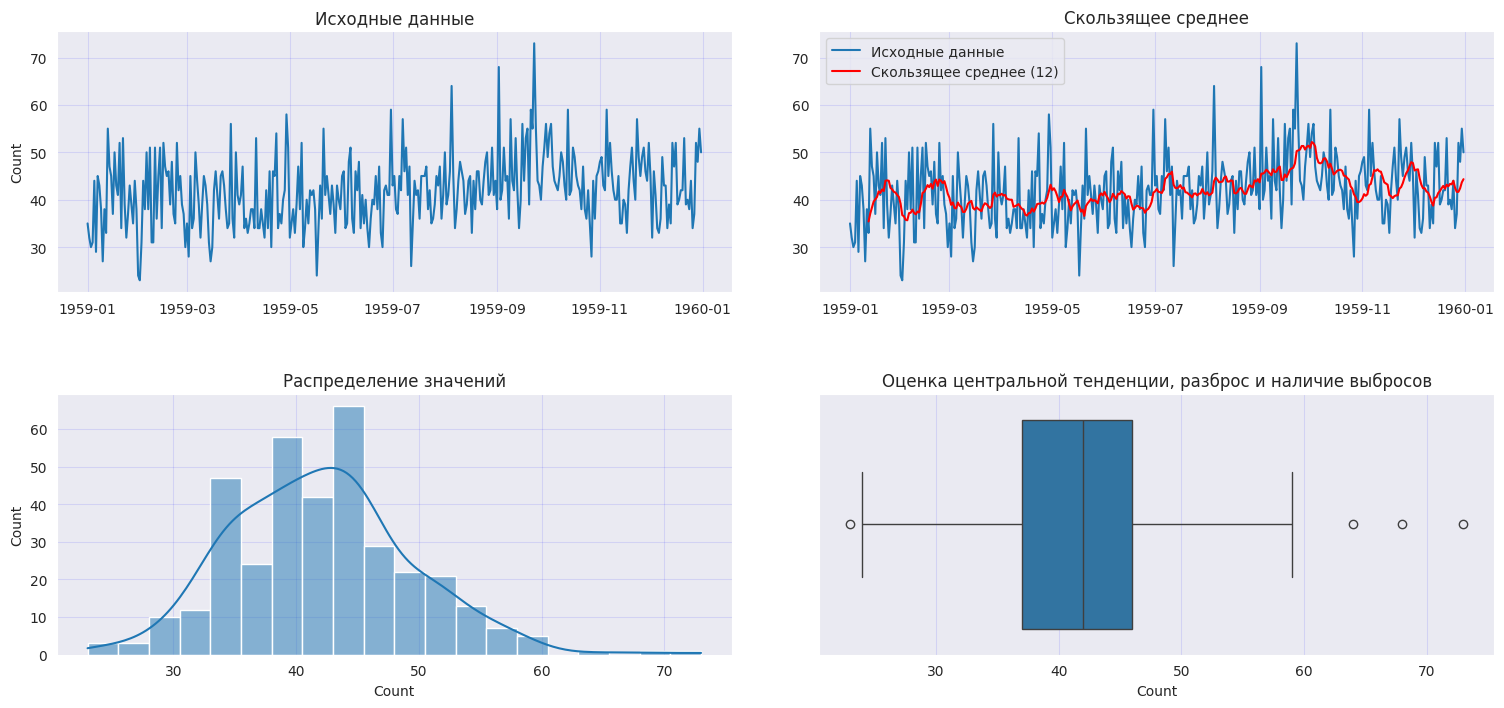

In [ ]:
# АНАЛИЗ и ОЦЕНКА ВРЕМЕННОГО РЯДА
check_stationarity(df_chart_3)

## **international_airline_passengers** (международные авиакомпании пассажиры)

In [ ]:
df_chart_4 = series_index_date(dict_datasets['international_airline_passengers'][0], label_date='Month', start_date='1949', freq='ME')
df_chart_4.head(3)

,Count
1949-01-31,112
1949-02-28,118
1949-03-31,132


Результаты теста на стационарность:
ADF статистика: 0.81537
p-значение: 0.99188
Вывод: Ряд не стационарен


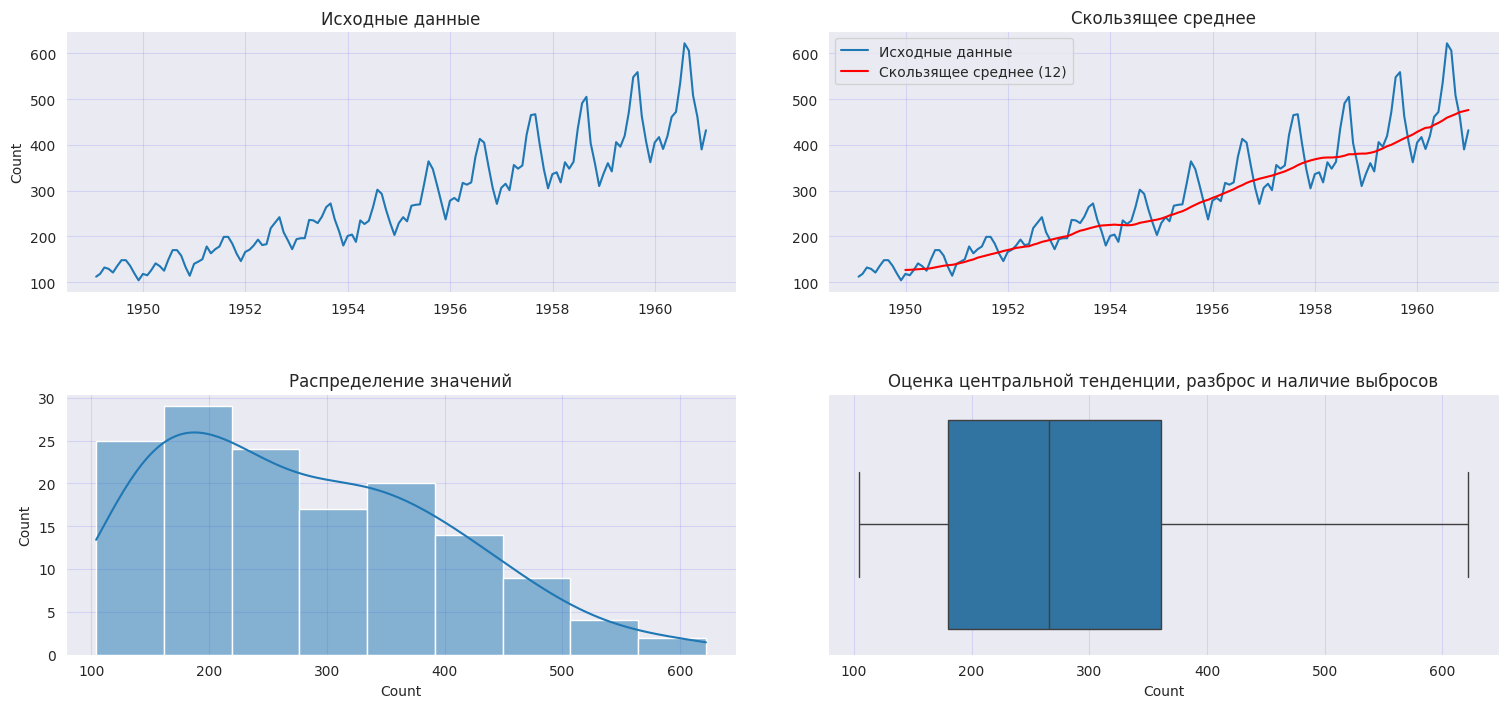

In [ ]:
# АНАЛИЗ и ОЦЕНКА ВРЕМЕННОГО РЯДА
check_stationarity(df_chart_4)

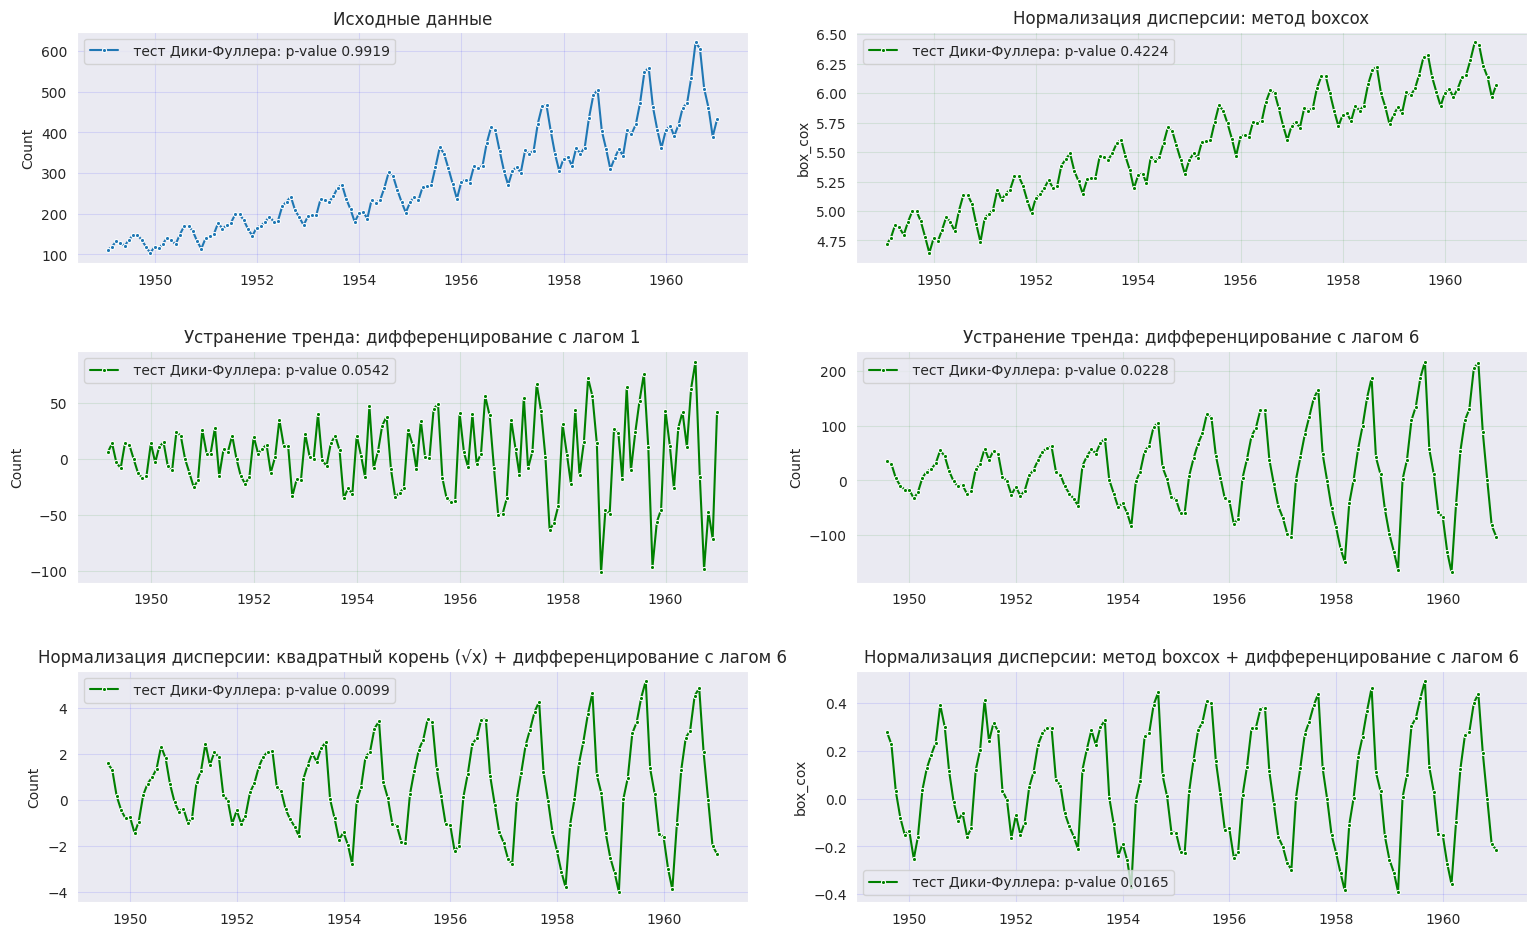

In [ ]:
# ПРЕОБРАЗОВАНИЕ В СТАЦИОНАРНЫЙ РЯД
fix_stationarity(df_chart_4, 1, 6)

## **monthly_sales_of_company_x_jan** (ежемесячные продажи компании x)

In [ ]:
df_chart_5 = series_index_date(dict_datasets['monthly_sales_of_company_x_jan'][0], label_date='Month', start_date='1965', freq='ME')
df_chart_5.head(3)

,Count
1965-01-31,154
1965-02-28,96
1965-03-31,73


Результаты теста на стационарность:
ADF статистика: 0.65472
p-значение: 0.98889
Вывод: Ряд не стационарен


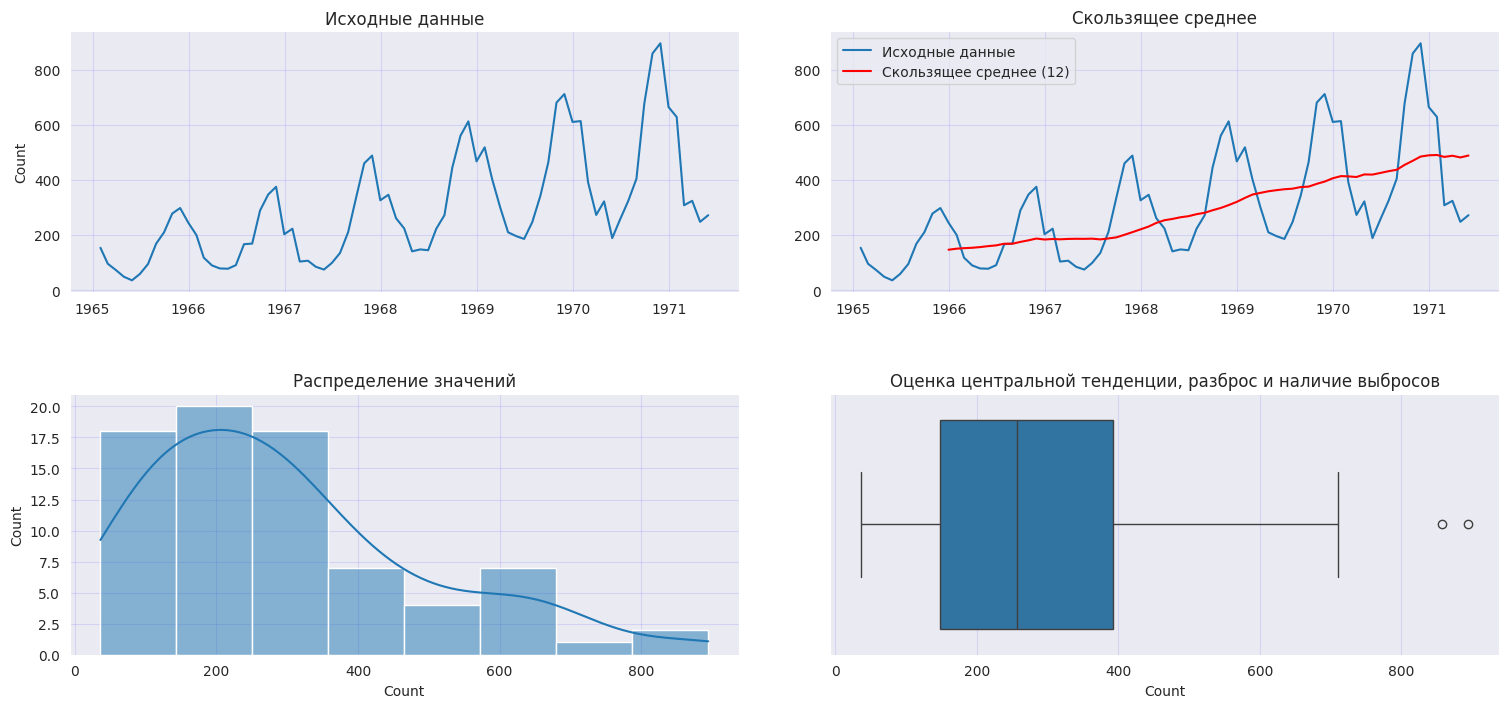

In [ ]:
# АНАЛИЗ и ОЦЕНКА ВРЕМЕННОГО РЯДА
check_stationarity(df_chart_5)

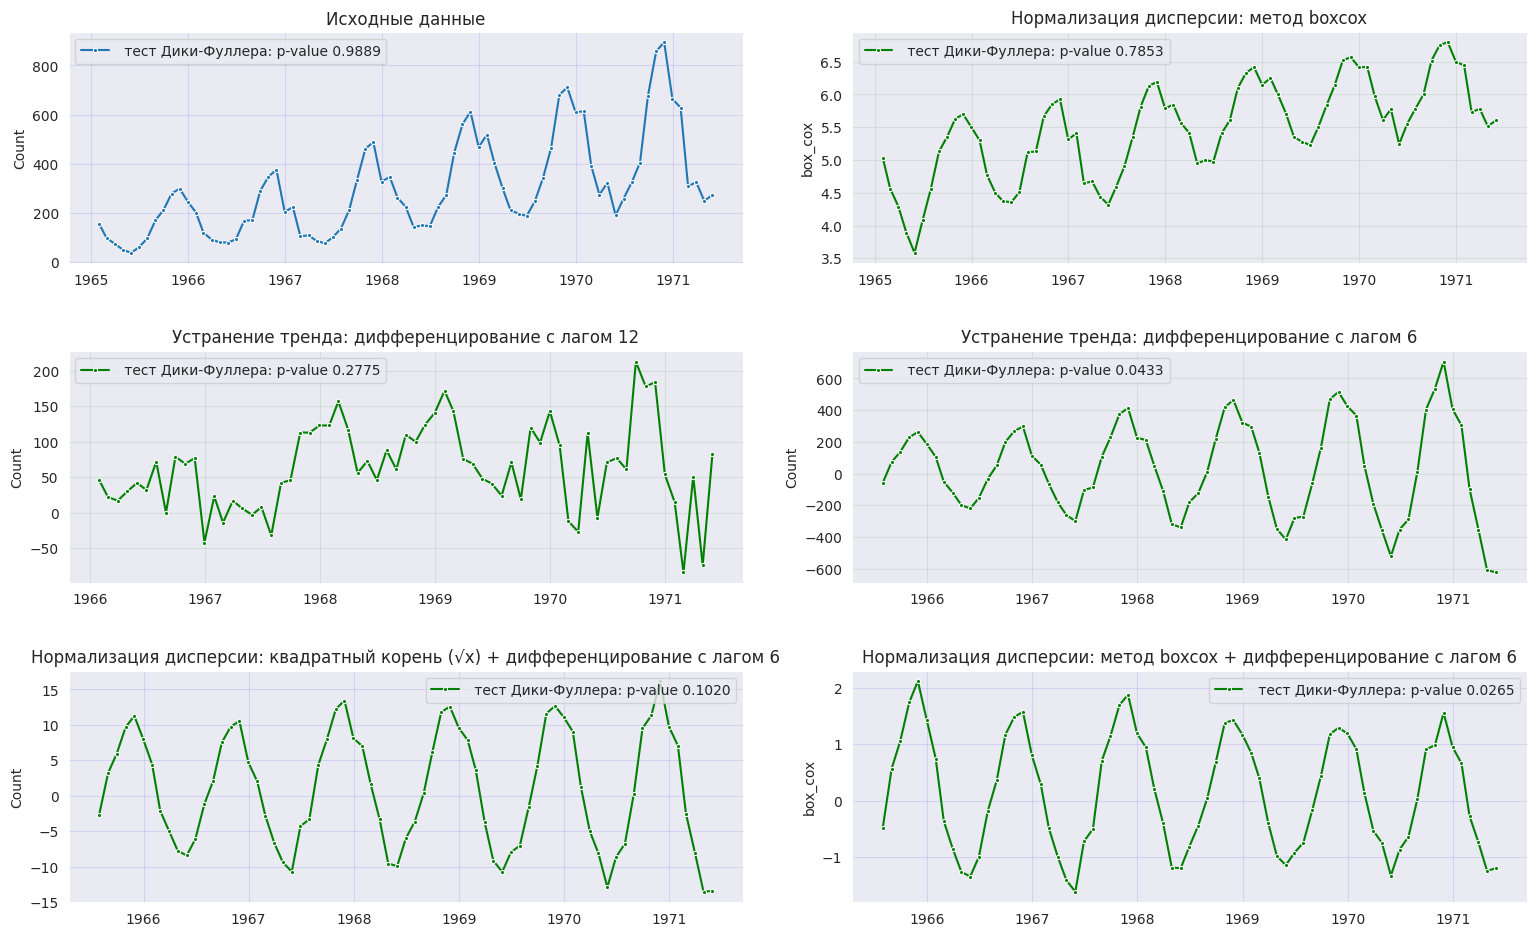

In [ ]:
# ПРЕОБРАЗОВАНИЕ В СТАЦИОНАРНЫЙ РЯД
fix_stationarity(df_chart_5, 12, 6)

## **weekly_closings_of_the_dowjones** (еженедельное закрытие индекса dowjones)

In [ ]:
dict_datasets['weekly_closings_of_the_dowjones'][0].head(1)

,Week,Close
0,1971-W27,890.19


In [ ]:
from isoweek import Week
start_date = Week(1971, 27).monday()
print(start_date)

1971-07-05


In [ ]:
df_chart_6 = series_index_date(dict_datasets['weekly_closings_of_the_dowjones'][0], label_date='Week', start_date=start_date, freq='W-MON')
df_chart_6.head(3)

,Close
1971-07-05,890.19
1971-07-12,901.80
1971-07-19,888.51


Результаты теста на стационарность:
ADF статистика: -1.31463
p-значение: 0.62245
Вывод: Ряд не стационарен


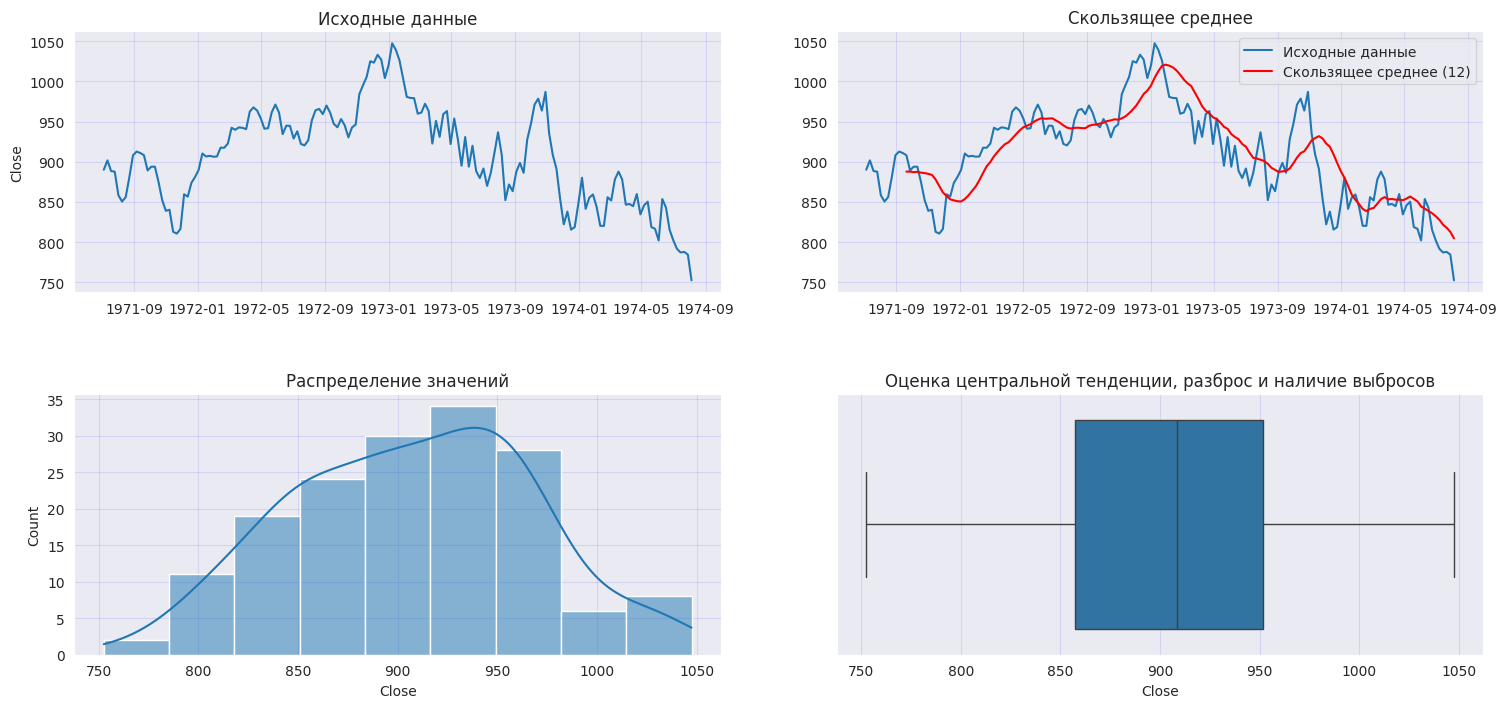

In [ ]:
# АНАЛИЗ и ОЦЕНКА ВРЕМЕННОГО РЯДА
check_stationarity(df_chart_6)

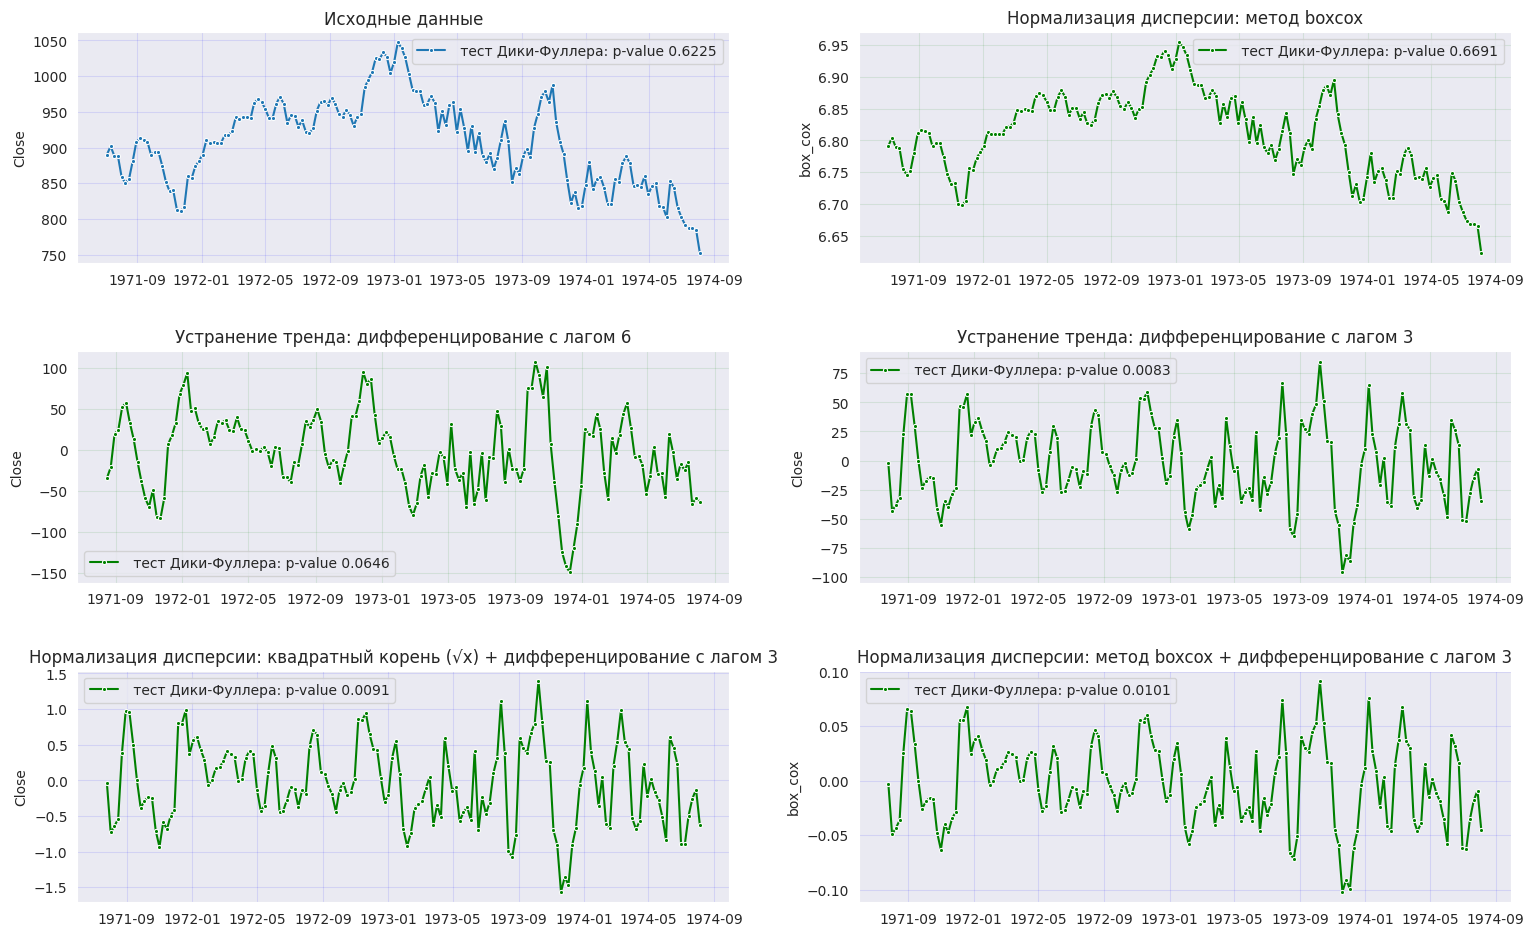

In [ ]:
# ПРЕОБРАЗОВАНИЕ В СТАЦИОНАРНЫЙ РЯД
fix_stationarity(df_chart_6, 6, 3)